# Pachete necesare pentru folosirea acestui Notebook

Vom folosi [scipy](https://scipy.org/), [numpy](https://numpy.org/) și [matplotlib](https://matplotlib.org/).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc, ndimage
from scipy.fft import dctn, idctn

# Imaginea cu care lucrăm

Vom folosi o imagine din setul de date oferit implicit de către scipy.

/tmp/ipykernel_923/866361824.py:1: DeprecationWarning: scipy.misc.ascent has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.ascent instead.
  X = misc.ascent()


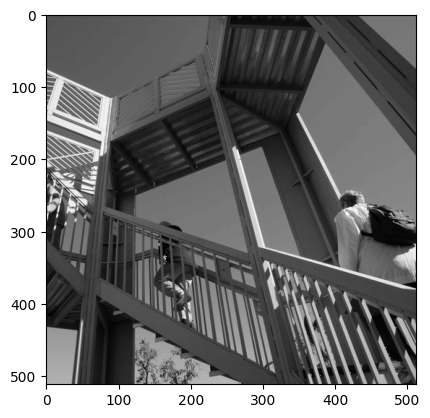

In [2]:
X = misc.ascent()
plt.imshow(X, cmap=plt.cm.gray)
plt.show()

# Transformata DCT a unei imagini

Transformata DCT se extinde la mai multe dimensiuni similar cu transformata DFT. Pentru un semnal bidimensional, precum o imagine, DCT-II devine:

$$
Y_{m_1,m_2} = \sum_{n_1=0}^{N_1-1}
              \sum_{n_2=0}^{N_2-1}
              x_{n_1,n_2}
              \cos\left[\frac{\pi}{N_1}m_1
                \left(n_1 + \frac12\right)\right]
              \cos\left[\frac{\pi}{N_2}m_2\left(n_2 + \frac12\right)\right]
$$

* unde $n_1$ și $n_2$ sunt pozițile pixelilor pe orizontală, respectiv, pe verticală
* bin-urile rezultate corespund pozițiilor pixelilor
* spectrul este în continuare simetric și par
* proprietățile transformatei DCT-II sunt respectate și în cazul celei 2D

În Python avem rutina `scipy.fft.dct` pentru 1D și `scipy.fft.dctn` pentru generalizarea la semnale $n$-dimensionale. Dimensiunea este determinată automat după forma semnalului; tipul DCT poate fi specificat prin atributul `type` (implicit II).

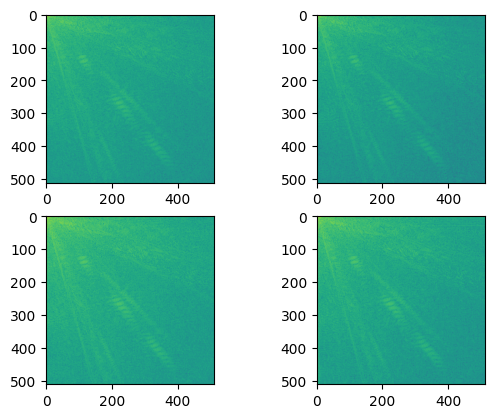

In [3]:
Y1 = dctn(X, type=1)
Y2 = dctn(X, type=2)
Y3 = dctn(X, type=3)
Y4 = dctn(X, type=4)
freq_db_1 = 20*np.log10(abs(Y1))
freq_db_2 = 20*np.log10(abs(Y2))
freq_db_3 = 20*np.log10(abs(Y3))
freq_db_4 = 20*np.log10(abs(Y4))

plt.subplot(221).imshow(freq_db_1)
plt.subplot(222).imshow(freq_db_2)
plt.subplot(223).imshow(freq_db_3)
plt.subplot(224).imshow(freq_db_4)
plt.show()

# Compactarea energiei. Compresie.

Putem profita de proprietatea compresiei energiei prin anularea frecvențelor DCT începând cu *bin*-ul `k` după care aplicăm transformata DCT inversă (similar cu tema anterioară):

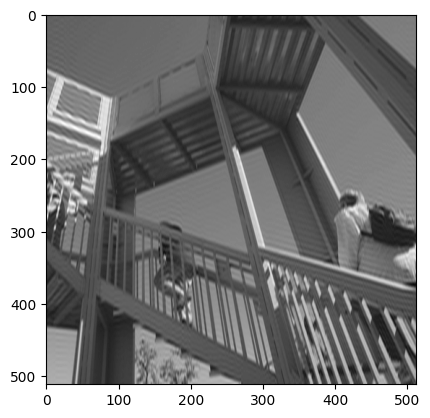

In [8]:
k = 120
Y_ziped = Y2.copy()
Y_ziped[k:] = 0
X_ziped = idctn(Y_ziped)

plt.imshow(X_ziped, cmap=plt.cm.gray)
plt.show()

# JPEG

Algoritmul de compresie JPEG are patru etape:

1. transformarea imaginii din pixeli RGB în Y'CbCr
2. aplicarea 2D-DCT pe blocuri disincte de 8x8 pixeli din imagine
3. cuantizarea în frecvență cu $Q$ dat de standardul JPEG
4. opțional compresia rezultatului cu coduri Huffman

Unde matricea JPEG de cuantizare $Q$ este:
$$
Q =
\begin{bmatrix}
16 & 11 & 10 & 16 & 24 & 40 & 51 & 61 & \\
12 & 12 & 14 & 19 & 26 & 28 & 60 & 55 & \\
14 & 13 & 16 & 24 & 40 & 57 & 69 & 56 & \\
14 & 17 & 22 & 29 & 51 & 87 & 80 & 62 & \\
18 & 22 & 37 & 56 & 68 & 109 & 103 & 77 & \\
24 & 35 & 55 & 64 & 81 & 104 & 113 & 92 & \\
49 & 64 & 78 & 87 & 103 & 121 & 120 & 101\\
72 & 92 & 95 & 98 & 112 & 100 & 103 & 99\\
\end{bmatrix}
$$

Imaginea noastră de test este monocromă, deci nu necesită pasul 1, dar putem efectua o operație de *down-sampling* în preprocesare precum am prezentat la curs.

[[ 83  83  83 ... 117 117 117]
 [ 82  82  83 ... 117 117 117]
 [ 80  81  83 ... 117 117 117]
 ...
 [178 178 178 ...  57  59  57]
 [178 178 178 ...  56  57  57]
 [178 178 178 ...  57  57  58]]
[[ 80.  80.  80. ... 120. 120. 120.]
 [ 80.  80.  80. ... 120. 120. 120.]
 [ 80.  80.  80. ... 120. 120. 120.]
 ...
 [180. 180. 180. ...  60.  60.  60.]
 [180. 180. 180. ...  60.  60.  60.]
 [180. 180. 180. ...  60.  60.  60.]]


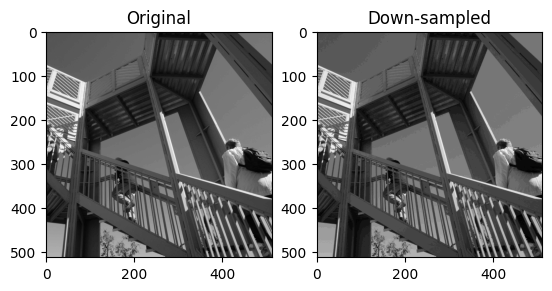

In [10]:
Q_down = 10

X_jpeg = X.copy()
X_jpeg = Q_down*np.round(X_jpeg/Q_down)

plt.subplot(121).imshow(X, cmap=plt.cm.gray)
plt.title('Original')
plt.subplot(122).imshow(X_jpeg, cmap=plt.cm.gray)
plt.title('Down-sampled')
plt.show()

Pentru fiecare bloc de $8\times 8$ aplică DCT și cuantizare.

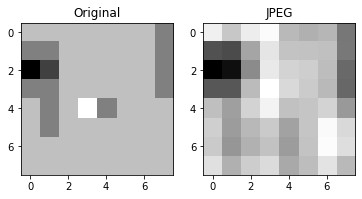

Componente în frecvență:64
Componente în frecvență după cuantizare: 14


In [9]:
Q_jpeg = [[16, 11, 10, 16, 24, 40, 51, 61],
          [12, 12, 14, 19, 26, 28, 60, 55],
          [14, 13, 16, 24, 40, 57, 69, 56],
          [14, 17, 22, 29, 51, 87, 80, 62],
          [18, 22, 37, 56, 68, 109, 103, 77],
          [24, 35, 55, 64, 81, 104, 113, 92],
          [49, 64, 78, 87, 103, 121, 120, 101],
          [72, 92, 95, 98, 112, 100, 103, 99]]

# Encoding
x = X[:8, :8]
y = dctn(x)
y_jpeg = Q_jpeg*np.round(y/Q_jpeg)

# Decoding
x_jpeg = idctn(y_jpeg)

# Results
y_nnz = np.count_nonzero(y)
y_jpeg_nnz = np.count_nonzero(y_jpeg)

plt.subplot(121).imshow(x, cmap=plt.cm.gray)
plt.title('Original')
plt.subplot(122).imshow(x_jpeg, cmap=plt.cm.gray)
plt.title('JPEG')
plt.show()

print('Componente în frecvență:' + str(y_nnz) + 
      '\nComponente în frecvență după cuantizare: ' + str(y_jpeg_nnz))

# Sarcini

1. [6p] Completați algoritmul JPEG incluzând toate blocurile din imagine.

2. [4p] Extindeți la imagini color (incluzând transformarea din RGB în Y'CbCr). Exemplificați pe `scipy.misc.face` folosită în tema anterioară.

3. [6p] Extindeți algoritmul pentru compresia imaginii până la un prag MSE impus de utilizator.

4. [4p] Extindeți algoritmul pentru compresie video. Demonstrați pe un clip scurt din care luați fiecare cadru și îl tratați ca pe o imagine.

/var/folders/xv/w6vjg90x4pd72d9mbrnc1v6h0000gn/T/ipykernel_3269/1779196980.py:79: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  X = misc.face()


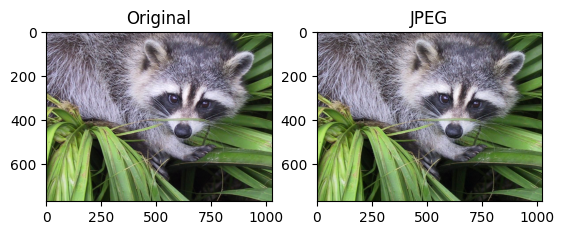

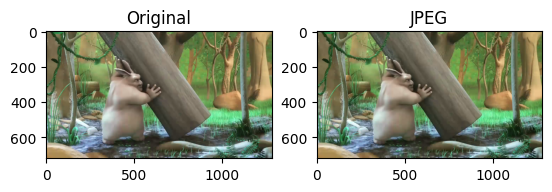

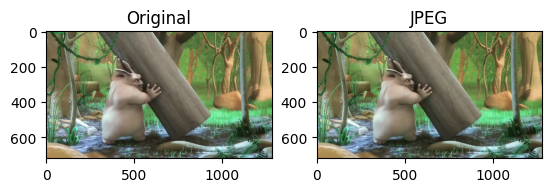

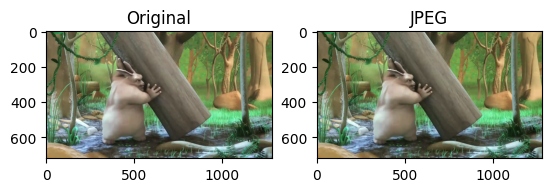

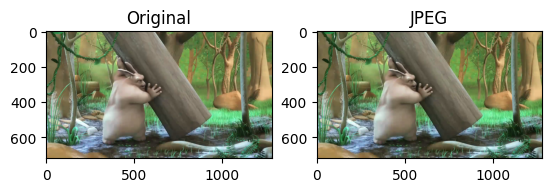

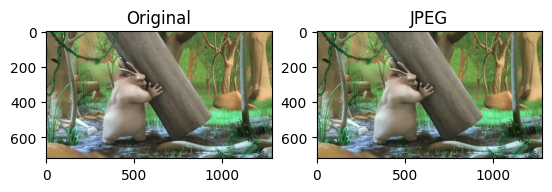

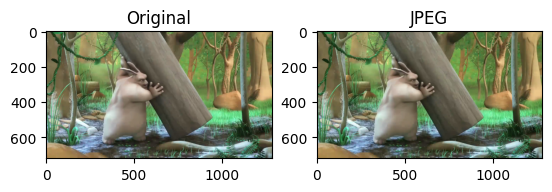

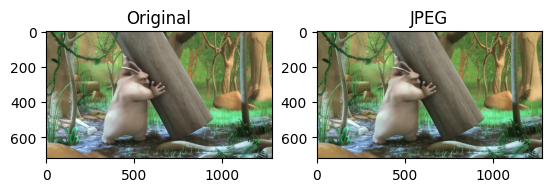

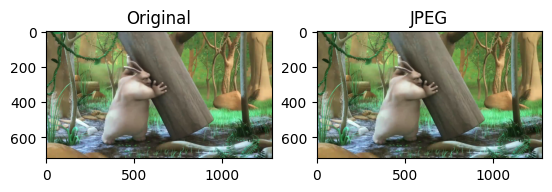

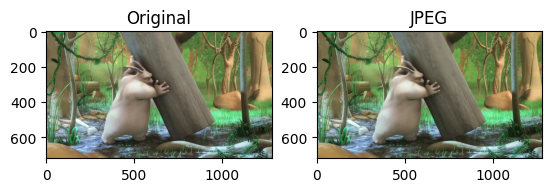

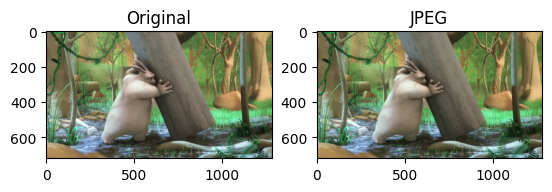

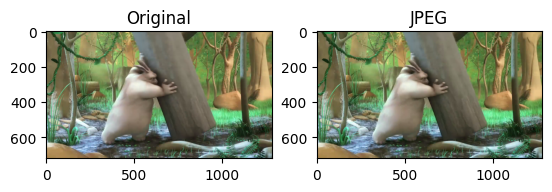

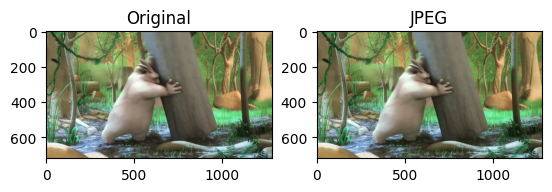

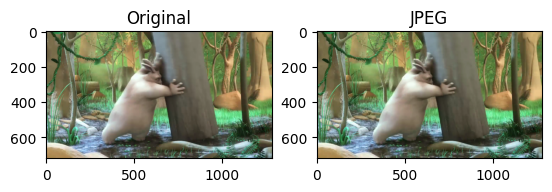

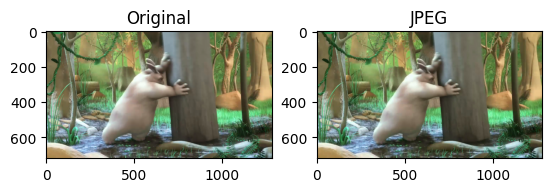

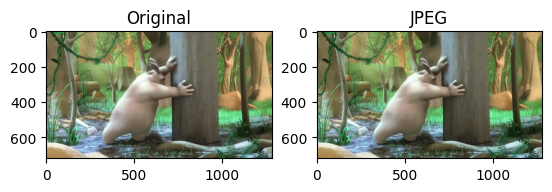

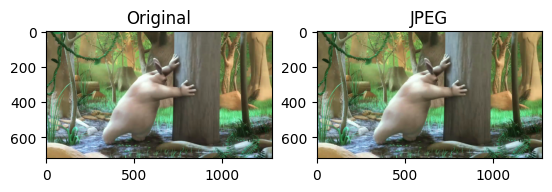

In [8]:
# ex1

def jpegCompression(img, mse_bound = 5):
    
    def rgb2ycbcr(im):
        xform = np.array([[.299, .587, .114], [-.1687, -.3313, .5], [.5, -.4187, -.0813]])
        ycbcr = im.dot(xform.T)
        ycbcr[:,:,[1,2]] += 128
        return np.uint8(ycbcr)
    
    
    def ycbcr2rgb(im):
        xform = np.array([[1, 0, 1.402], [1, -0.34414, -.71414], [1, 1.772, 0]])
        rgb = im.astype(np.float64)
        rgb[:,:,[1,2]] -= 128
        rgb = rgb.dot(xform.T)
        np.putmask(rgb, rgb > 255, 255)
        np.putmask(rgb, rgb < 0, 0)
        return np.uint8(rgb)
    
    def encodeBlock(block, quantization_type):
        if quantization_type == 'Y':
            Q_jpeg = 10 *  np.array([[16, 11, 10, 16, 24, 40, 51, 61],
                    [12, 12, 14, 19, 26, 28, 60, 55],
                    [14, 13, 16, 24, 40, 57, 69, 56],
                    [14, 17, 22, 29, 51, 87, 80, 62],
                    [18, 22, 37, 56, 68, 109, 103, 77],
                    [24, 35, 55, 64, 81, 104, 113, 92],
                    [49, 64, 78, 87, 103, 121, 120, 101],
                    [72, 92, 95, 98, 112, 100, 103, 99]])
        elif quantization_type == 'C':
            Q_jpeg = 10 * np.array([
                    [17, 18, 24, 47, 99, 99, 99, 99],
                    [18, 21, 26, 66, 99, 99, 99, 99],
                    [24, 26, 56, 99, 99, 99, 99, 99],
                    [47, 66, 99, 99, 99, 99, 99, 99],
                    [99, 99, 99, 99, 99, 99, 99, 99],
                    [99, 99, 99, 99, 99, 99, 99, 99],
                    [99, 99, 99, 99, 99, 99, 99, 99],
                    [99, 99, 99, 99, 99, 99, 99, 99]])

        mean = np.mean(block)
        y = dctn(block - mean, s=(8, 8))
        y_jpeg = Q_jpeg*np.round(y/Q_jpeg)
        return idctn(y_jpeg) + mean
    
    def compressLayer(layer, quantization_type):
        X = layer.copy()
        h, w = X.shape 
        for row in range(0, h, 8):
            for col in range(0, w, 8):
                limit_row = min(row + 8, h)
                limit_col = min(col + 8, w)
                
                block = X[row : limit_row, col : limit_col]
                blockEncoded = encodeBlock(block, quantization_type)
                X[row : limit_row, col : limit_col] = blockEncoded[: limit_row - row,: limit_col - col]
        return X
                
    X = img.copy()
    
    # ex3
    while np.mean((img - X) ** 2) < mse_bound:
        
        # ex2
        if len(X.shape) == 3:
            X = rgb2ycbcr(X)
            y, cb, cr    = X[:, :, 0], X[:, :, 1], X[:, :, 2]
            y, cb, cr = compressLayer(y, 'Y'), compressLayer(cb, 'C'), compressLayer(cr, 'C')
            
            X = np.dstack((y, cb, cr))
            X = ycbcr2rgb(X)
        elif len(X.shape) == 2:
            X = compressLayer(X, 'Y')
    
    return X
            

X = misc.face()

X_compressed = jpegCompression(X, 10)

plt.subplot(121).imshow(X)
plt.title('Original')
plt.subplot(122).imshow(X_compressed)
plt.title('JPEG')
plt.show()

# ex4
import cv2

def compressVideo(video):
    success,image = video.read()
    count = 0
    while success:
        image_compressed = jpegCompression(image)
        
        plt.subplot(121).imshow(image)
        plt.title('Original')
        plt.subplot(122).imshow(image_compressed)
        plt.title('JPEG')
        plt.show()
    
        success,image = video.read()
        count += 1
    
video = cv2.VideoCapture('BigBuckBunnyTrim.mp4')

compressVideo(video)

    